In [1]:
import pycaret
pycaret.__version__

'3.3.2'

In [2]:
import pandas as pd
from pycaret.regression import *

In [3]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

In [4]:
df = pd.read_csv('../data/FermentationBiomassProduction.csv')

In [5]:
df.dtypes

Unnamed: 0                                   int64
Inoculum size (cell/ml)                    float64
COD (g/L)                                  float64
Oil and grease (g/L)                       float64
TKN                                        float64
Olive oil (%)                                int64
Glucose (g/L)                                int64
Crude glycerol (%)                         float64
Tween 20 (%)                                 int64
Tween 80 (%)                                 int64
Peptone (g/L)                                int64
Ammonium sulfate (g/L)                     float64
Yeast extract (g/L)                          int64
Urea (g /L)                                float64
Total nitrogen (g/L)                       float64
Mono- sodium glutam ate (g/l)                int64
Di- potassium hydrogen phosphat e (g/l)    float64
Magnesium chloride (g/l)                   float64
Iron(III) chloride (g/l)                   float64
Potassium Di-hydrogen phosphate

In [6]:
df.rename(columns={'Mono- sodium glutam ate (g/l)': 'Mono-sodium glutamate (g/l)'}, inplace=True)
df.rename(columns={'Di- potassium hydrogen phosphat e (g/l)': 'Di-potassium hydrogen phosphate (g/l)'}, inplace=True)
df.rename(columns={'Shakin g rate (rpm)': 'Shaking rate (rpm)'}, inplace=True)

In [7]:
df.drop(columns=['Unnamed: 0', 'Reference year'], inplace = True)

In [8]:
df.dtypes

Inoculum size (cell/ml)                  float64
COD (g/L)                                float64
Oil and grease (g/L)                     float64
TKN                                      float64
Olive oil (%)                              int64
Glucose (g/L)                              int64
Crude glycerol (%)                       float64
Tween 20 (%)                               int64
Tween 80 (%)                               int64
Peptone (g/L)                              int64
Ammonium sulfate (g/L)                   float64
Yeast extract (g/L)                        int64
Urea (g /L)                              float64
Total nitrogen (g/L)                     float64
Mono-sodium glutamate (g/l)                int64
Di-potassium hydrogen phosphate (g/l)    float64
Magnesium chloride (g/l)                 float64
Iron(III) chloride (g/l)                 float64
Potassium Di-hydrogen phosphate (g/l)    float64
Calcium chloride (g/l)                   float64
Sodium chloride (g/l

In [9]:
df.sample(5)

,Inoculum size (cell/ml),COD (g/L),Oil and grease (g/L),TKN,Olive oil (%),Glucose (g/L),Crude glycerol (%),Tween 20 (%),Tween 80 (%),Peptone (g/L),...,Magnesium chloride (g/l),Iron(III) chloride (g/l),Potassium Di-hydrogen phosphate (g/l),Calcium chloride (g/l),Sodium chloride (g/l),Temp (C),Shaking rate (rpm),pH,Time (h),Biomass (g/l)
184,100000000.0,101.0,3.300,0.0000,0,0,1.240,0,0,0,...,0.0,0.0,0.0,0.0,0,30,140,6.0,12,4.09
222,100000000.0,101.0,5.610,0.0000,0,0,2.108,0,0,0,...,0.0,0.0,0.0,0.0,0,30,140,6.0,48,4.73
249,100000000.0,101.0,3.300,0.0000,0,0,1.240,0,0,0,...,0.0,0.0,0.0,0.0,0,30,140,6.0,36,3.82
42,100000000.0,42.5,0.241,0.1825,0,0,0.000,0,0,0,...,0.0,0.0,0.0,0.0,0,30,140,6.0,0,0.00
22,100000000.0,42.5,0.241,0.1825,0,0,0.000,0,0,0,...,0.0,0.0,0.0,0.0,0,30,140,4.3,12,0.72


In [10]:
df.shape

(311, 26)

In [11]:
df.dropna(inplace = True)

In [12]:
df.shape

(277, 26)

In [13]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [16]:
# check the type of exp
type(exp)

pycaret.regression.oop.RegressionExperiment

In [17]:
# init setup on exp
exp.setup(df, target = 'Biomass (g/l)', session_id = 42, experiment_name = 'BiomassPycaret')

,Description,Value
0,Session id,42
1,Target,Biomass (g/l)
2,Target type,Regression
3,Original data shape,"(277, 26)"
4,Transformed data shape,"(277, 26)"
5,Transformed train set shape,"(193, 26)"
6,Transformed test set shape,"(84, 26)"
7,Numeric features,25
8,Preprocess,True
9,Imputation type,simple


In [18]:
# compare baseline models
best = exp.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.4970,0.8545,0.8254,0.8902,0.1893,0.2828,0.1030
gbr,Gradient Boosting Regressor,0.5104,0.8878,0.8317,0.8778,0.1907,0.1840,0.0060
xgboost,Extreme Gradient Boosting,0.5439,1.0753,0.9320,0.8601,0.1898,0.2138,0.0070
et,Extra Trees Regressor,0.5117,1.0274,0.8799,0.8574,0.1794,0.2261,0.0090
dt,Decision Tree Regressor,0.5900,1.3198,0.9968,0.8340,0.1933,0.2107,0.0030
rf,Random Forest Regressor,0.5820,1.3489,1.0134,0.8295,0.1966,0.2557,0.0120
ada,AdaBoost Regressor,0.9522,2.0110,1.3028,0.6949,0.3435,0.7576,0.0050
knn,K Neighbors Regressor,0.8820,2.3413,1.3970,0.6711,0.3274,0.5463,0.0130
lightgbm,Light Gradient Boosting Machine,0.8582,2.7035,1.4618,0.6565,0.3133,0.4564,0.0960
lr,Linear Regression,0.9426,2.1369,1.3906,0.6295,0.3855,1.0034,0.1790


In [19]:
print(best)

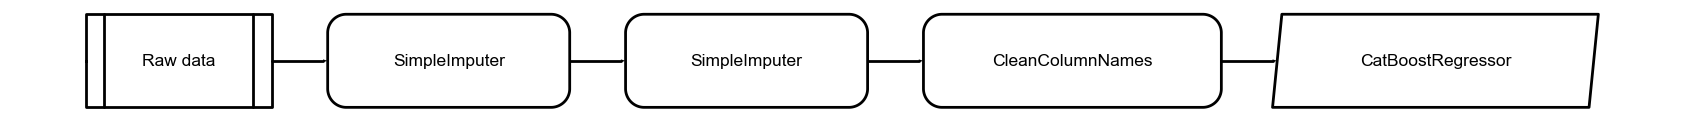

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [20]:
# analyze model
exp.evaluate_model(best)

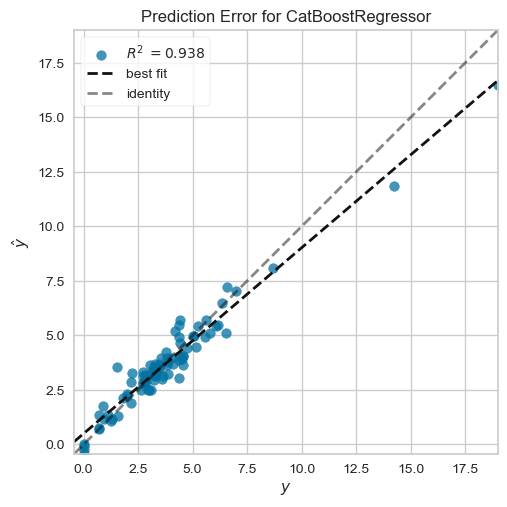

In [21]:
# plot residuals
exp.plot_model(best, plot = 'error')

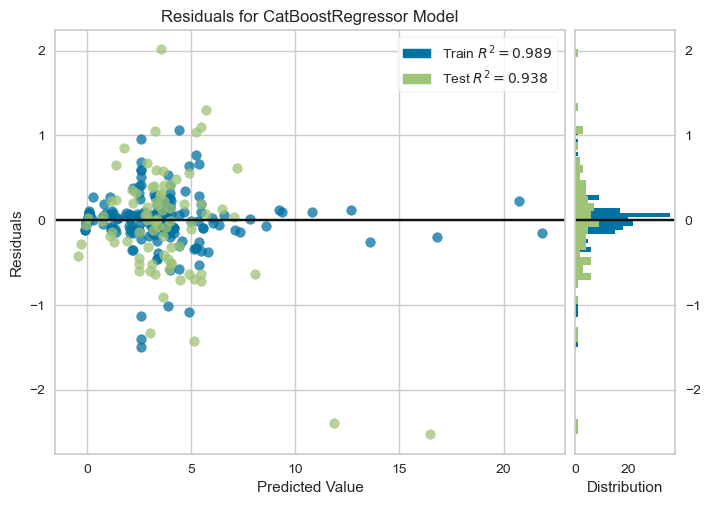

In [22]:
# plot residuals
exp.plot_model(best, plot = 'residuals')

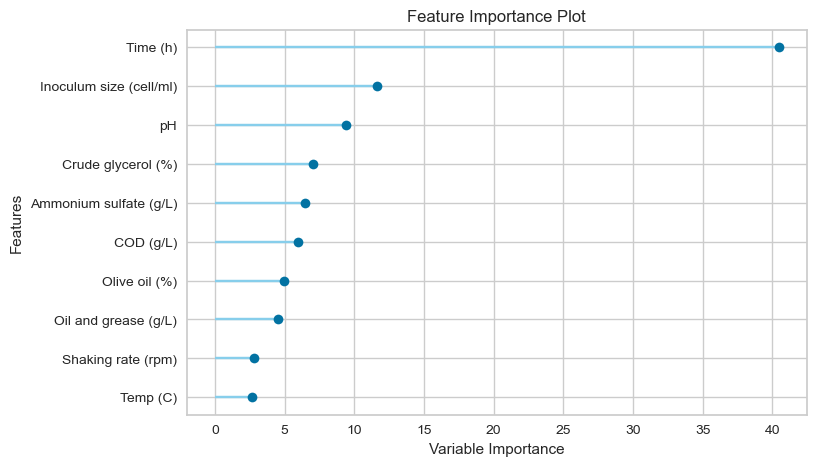

In [23]:
exp.plot_model(best, plot = 'feature')

In [24]:
exp.predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.4598,0.4433,0.6658,0.9375,0.1402,0.1491


,Inoculum size (cell/ml),COD (g/L),Oil and grease (g/L),TKN,Olive oil (%),Glucose (g/L),Crude glycerol (%),Tween 20 (%),Tween 80 (%),Peptone (g/L),...,Iron(III) chloride (g/l),Potassium Di-hydrogen phosphate (g/l),Calcium chloride (g/l),Sodium chloride (g/l),Temp (C),Shaking rate (rpm),pH,Time (h),Biomass (g/l),prediction_label
30,100000000.0,42.500000,0.241,0.1825,0,0,0.000,0,0,0,...,0.00,0.0,0.00,0,30,140,5.0,24,4.36,3.034777
133,100000000.0,112.594002,0.000,0.0000,0,0,4.000,0,0,0,...,0.00,0.0,0.00,0,30,140,6.0,72,3.33,3.325909
229,100000000.0,101.000000,3.300,0.0000,0,0,1.240,0,0,0,...,0.00,0.0,0.00,0,30,140,6.0,48,3.27,3.680480
149,100000000.0,225.669998,0.000,0.0000,0,0,10.000,0,0,0,...,0.00,0.0,0.00,0,30,140,6.0,12,0.94,1.163187
288,10000000.0,44.000000,0.280,0.0000,0,0,0.000,0,0,0,...,0.01,0.2,0.05,5,30,140,6.0,72,3.05,3.634289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,100000000.0,37.209999,0.000,0.0000,0,0,0.000,0,0,0,...,0.00,0.0,0.00,0,30,140,6.0,24,1.80,2.151932
179,100000000.0,101.000000,4.950,0.0000,0,0,1.860,0,0,0,...,0.00,0.0,0.00,0,30,140,6.0,36,5.55,4.915194
55,100000000.0,0.000000,0.000,0.0000,0,40,0.000,0,0,5,...,0.00,0.0,0.00,0,30,140,6.0,48,7.00,7.037296
214,100000000.0,101.000000,5.610,0.0000,0,0,2.108,0,0,0,...,0.00,0.0,0.00,0,30,140,6.0,36,4.36,4.046046


In [25]:
X_test = exp.predict_model(best)
X_test.drop(columns=['Biomass (g/l)', 'prediction_label'], inplace = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.4598,0.4433,0.6658,0.9375,0.1402,0.1491


In [26]:
X_test.iloc[0, :]

Inoculum size (cell/ml)                  1.000000e+08
COD (g/L)                                4.250000e+01
Oil and grease (g/L)                     2.410000e-01
TKN                                      1.825000e-01
Olive oil (%)                            0.000000e+00
Glucose (g/L)                            0.000000e+00
Crude glycerol (%)                       0.000000e+00
Tween 20 (%)                             0.000000e+00
Tween 80 (%)                             0.000000e+00
Peptone (g/L)                            0.000000e+00
Ammonium sulfate (g/L)                   4.761905e+00
Yeast extract (g/L)                      0.000000e+00
Urea (g /L)                              0.000000e+00
Total nitrogen (g/L)                     0.000000e+00
Mono-sodium glutamate (g/l)              0.000000e+00
Di-potassium hydrogen phosphate (g/l)    0.000000e+00
Magnesium chloride (g/l)                 0.000000e+00
Iron(III) chloride (g/l)                 0.000000e+00
Potassium Di-hydrogen phosph

In [27]:
import shap
shap.initjs()

# init setup
from pycaret.regression import *
r1 = setup(data = df, target = 'Biomass (g/l)')

# creating a model
gbr = create_model('gbr')

# explain the model's predictions using the TreeExplainer
explainer = shap.TreeExplainer(gbr)
shap_values = explainer.shap_values(X_test)

,Description,Value
0,Session id,6423
1,Target,Biomass (g/l)
2,Target type,Regression
3,Original data shape,"(277, 26)"
4,Transformed data shape,"(277, 26)"
5,Transformed train set shape,"(193, 26)"
6,Transformed test set shape,"(84, 26)"
7,Numeric features,25
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6794,1.2337,1.1107,0.9234,0.2708,0.3653
1,0.3926,0.2316,0.4813,0.9201,0.1012,0.1128
2,0.3557,0.1964,0.4431,0.9067,0.0999,0.0971
3,0.3972,0.2773,0.5266,0.9173,0.2051,0.2625
4,0.2518,0.1107,0.3327,0.9733,0.0927,0.2211
5,0.6757,1.2338,1.1107,0.9350,0.1858,0.1892
6,0.6191,1.7862,1.3365,0.8067,0.1743,0.2638
7,0.5237,0.6611,0.8131,0.9506,0.1590,0.1175
8,0.4781,0.3536,0.5946,0.8616,0.1769,0.2996


In [28]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[2,:], X_test.iloc[2,:])

In [29]:
# visualize the test set predictions
shap.force_plot(explainer.expected_value, shap_values, X_test)

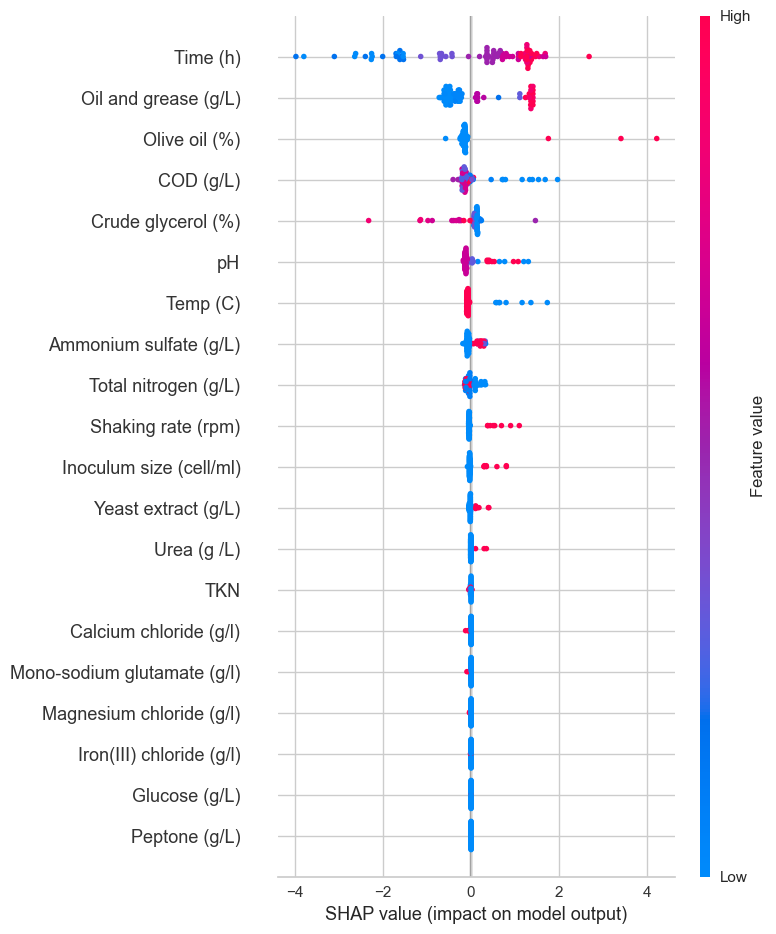

In [30]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_test)

In [31]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.2922,0.2046,0.4523,0.9773,0.1188,0.1114


In [32]:
# show predictions df
holdout_pred.head()

,Inoculum size (cell/ml),COD (g/L),Oil and grease (g/L),TKN,Olive oil (%),Glucose (g/L),Crude glycerol (%),Tween 20 (%),Tween 80 (%),Peptone (g/L),...,Iron(III) chloride (g/l),Potassium Di-hydrogen phosphate (g/l),Calcium chloride (g/l),Sodium chloride (g/l),Temp (C),Shaking rate (rpm),pH,Time (h),Biomass (g/l),prediction_label
47,100000000.0,42.500000,0.241,0.1825,0,0,0.00,0,0,0,...,0.0,0.0,0.0,0,30,140,6.0,60,2.27,2.521463
108,100000000.0,112.594002,0.000,0.0000,0,0,4.00,0,0,0,...,0.0,0.0,0.0,0,30,140,6.0,24,2.20,2.054097
126,100000000.0,74.902000,0.000,0.0000,0,0,2.00,0,0,0,...,0.0,0.0,0.0,0,30,140,6.0,72,3.22,3.517249
178,100000000.0,101.000000,4.950,0.0000,0,0,1.86,0,0,0,...,0.0,0.0,0.0,0,30,140,6.0,24,4.09,3.986773
155,100000000.0,101.000000,3.300,0.0000,0,0,1.24,0,0,0,...,0.0,0.0,0.0,0,30,140,6.0,0,0.00,0.269777


In [33]:
best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.4175,0.4009,0.6071,0.9375,0.1523,0.2577,0.0950
et,Extra Trees Regressor,0.4561,0.6155,0.7141,0.9132,0.1684,0.2619,0.0090
xgboost,Extreme Gradient Boosting,0.4626,0.6793,0.7404,0.9201,0.1621,0.1873,0.0050
gbr,Gradient Boosting Regressor,0.4757,0.6305,0.7219,0.9160,0.1624,0.2032,0.0050
rf,Random Forest Regressor,0.4987,0.7363,0.7665,0.9044,0.1605,0.2495,0.0110
dt,Decision Tree Regressor,0.5218,0.8980,0.8530,0.8820,0.1794,0.2097,0.0030
lightgbm,Light Gradient Boosting Machine,0.7846,1.8775,1.2482,0.7644,0.2514,0.2952,0.0950
ridge,Ridge Regression,0.8686,1.9001,1.2700,0.7083,0.3474,0.6361,0.0020
lr,Linear Regression,0.9067,1.9527,1.2985,0.6795,0.3660,0.9856,0.0050
ada,AdaBoost Regressor,0.9105,1.5111,1.1871,0.7414,0.3121,0.8497,0.0060


In [34]:
# list of top 3 models by MAE
best_mae_models_top3

 ExtraTreesRegressor(n_jobs=-1, random_state=6423),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=6423, ...)]

In [35]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [36]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6794,1.2337,1.1107,0.9234,0.2708,0.3653
1,0.3926,0.2316,0.4813,0.9201,0.1012,0.1128
2,0.3557,0.1964,0.4431,0.9067,0.0999,0.0971
3,0.3972,0.2773,0.5266,0.9173,0.2051,0.2625
4,0.2518,0.1107,0.3327,0.9733,0.0927,0.2211
5,0.6757,1.2338,1.1107,0.9350,0.1858,0.1892
6,0.6191,1.7862,1.3365,0.8067,0.1743,0.2638
7,0.5237,0.6611,0.8131,0.9506,0.1590,0.1175
8,0.4781,0.3536,0.5946,0.8616,0.1769,0.2996


In [37]:
# tune hyperparameters of gbr
tuned_dt = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.8474,1.6801,1.2962,0.8957,0.3634,0.7633
1,0.5167,0.4926,0.7019,0.8300,0.1321,0.1347
2,0.3853,0.2115,0.4599,0.8995,0.1222,0.1200
3,0.5675,0.4976,0.7054,0.8515,0.2805,0.2883
4,0.4608,0.3313,0.5756,0.9200,0.2293,1.3392
5,0.7696,1.2418,1.1143,0.9346,0.2295,0.1676
6,0.5283,0.5939,0.7707,0.9357,0.1765,0.5021
7,0.6493,0.8579,0.9262,0.9359,0.1954,0.1483
8,0.6347,0.6695,0.8183,0.7379,0.2997,0.4418


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [38]:
gbr

GradientBoostingRegressor(random_state=6423)

In [39]:
# ensemble with bagging
ensemble_model(gbr, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.8223,2.0530,1.4328,0.8726,0.2835,0.3512
1,0.4285,0.3231,0.5685,0.8885,0.1017,0.1108
2,0.3745,0.1994,0.4465,0.9053,0.0998,0.1148
3,0.3664,0.2393,0.4892,0.9286,0.1866,0.2411
4,0.3382,0.1960,0.4427,0.9527,0.1171,0.4960
5,0.6482,1.0505,1.0249,0.9446,0.1990,0.2234
6,0.3688,0.3507,0.5922,0.9621,0.1315,0.4149
7,0.5157,0.7931,0.8906,0.9408,0.1388,0.1060
8,0.5136,0.3994,0.6320,0.8436,0.1882,0.3242


BaggingRegressor(estimator=GradientBoostingRegressor(random_state=6423),
                 random_state=6423)

In [40]:
# ensemble with boosting
ensemble_model(gbr, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6803,1.1929,1.0922,0.9260,0.2615,0.4246
1,0.4021,0.2607,0.5106,0.9100,0.1051,0.1200
2,0.3829,0.2072,0.4552,0.9016,0.0995,0.1228
3,0.4150,0.2885,0.5371,0.9139,0.1910,0.2497
4,0.3708,0.1867,0.4321,0.9549,0.1591,0.9428
5,0.5768,0.7789,0.8825,0.9590,0.1647,0.1545
6,0.4284,0.3599,0.5999,0.9611,0.1247,0.2858
7,0.6621,0.8603,0.9275,0.9357,0.1772,0.1517
8,0.5162,0.4673,0.6836,0.8171,0.2078,0.3493


AdaBoostRegressor(estimator=GradientBoostingRegressor(random_state=6423),
                  n_estimators=10, random_state=6423)

In [41]:
# blend top 3 models
blend_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6538,1.5851,1.2590,0.9016,0.2952,0.4317
1,0.3661,0.3006,0.5482,0.8963,0.1179,0.1166
2,0.3372,0.2029,0.4504,0.9036,0.0925,0.1037
3,0.3386,0.2228,0.4721,0.9335,0.1655,0.2157
4,0.2855,0.1056,0.3250,0.9745,0.1182,0.6487
5,0.5916,0.8504,0.9221,0.9552,0.1931,0.2166
6,0.4066,0.4323,0.6575,0.9532,0.1087,0.1197
7,0.5501,0.6586,0.8116,0.9508,0.1650,0.1282
8,0.3476,0.2679,0.5176,0.8951,0.1476,0.2302


VotingRegressor(estimators=[('CatBoost Regressor',
                             <catboost.core.CatBoostRegressor object at 0x3153bb3a0>),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=6423)),
                            ('Extreme Gradient Boosting',
                             XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device='cpu',
                                          early_...
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=-1,
                                          num_parallel_tree=None,
                                          random_state=6423, ...))],
                n_jobs=-1)

In [42]:
# stack models
stack_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6814,1.5654,1.2512,0.9029,0.3147,0.7349
1,0.3551,0.2826,0.5316,0.9024,0.1141,0.1085
2,0.3950,0.2374,0.4873,0.8872,0.1113,0.1110
3,0.3522,0.1897,0.4355,0.9434,0.1515,0.2184
4,0.2919,0.1224,0.3499,0.9704,0.1353,0.7703
5,0.5876,0.9389,0.9690,0.9505,0.1479,0.1539
6,0.3934,0.2671,0.5168,0.9711,0.1254,0.4384
7,0.5045,0.5584,0.7473,0.9583,0.1668,0.1250
8,0.3411,0.2732,0.5227,0.8931,0.1261,0.1837


StackingRegressor(cv=5,
                  estimators=[('CatBoost Regressor',
                               <catboost.core.CatBoostRegressor object at 0x315cc8310>),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=6423)),
                              ('Extreme Gradient Boosting',
                               XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device='cpu'...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=6423, ...))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1)